In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from modules.utils_data import load_data, plot_property_histograms, compare_distributions

Loading data from file
File not found, reading from SDF files
Reading OPERA_Data/VP_QR.sdf


100%|██████████| 2819/2819 [00:00<00:00, 7825.30it/s]


Reading OPERA_Data/LogP_QR.sdf


  0%|          | 0/13963 [00:00<?, ?it/s][18:18:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[18:18:08] ERROR: Could not sanitize molecule ending on line 38202
[18:18:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 13963/13963 [00:02<00:00, 5931.90it/s]


Reading OPERA_Data/AOH_QR.sdf


100%|██████████| 692/692 [00:00<00:00, 10693.01it/s]


Reading OPERA_Data/BCF_QR.sdf


  0%|          | 0/626 [00:00<?, ?it/s][18:18:11] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[18:18:11] ERROR: Could not sanitize molecule ending on line 5019
[18:18:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 626/626 [00:00<00:00, 6883.79it/s]


Reading OPERA_Data/Biodeg_QR.sdf


100%|██████████| 150/150 [00:00<00:00, 7004.91it/s]


Reading OPERA_Data/BP_QR.sdf


100%|██████████| 5434/5434 [00:00<00:00, 9673.18it/s]


Reading OPERA_Data/Clint_QR.sdf


100%|██████████| 551/551 [00:00<00:00, 5282.97it/s]


Reading OPERA_Data/FU_QR.sdf


100%|██████████| 1613/1613 [00:00<00:00, 4364.39it/s]


Reading OPERA_Data/HL_QR.sdf


100%|██████████| 697/697 [00:00<00:00, 7859.70it/s]


Reading OPERA_Data/KM_QR.sdf


100%|██████████| 541/541 [00:00<00:00, 6518.17it/s]


Reading OPERA_Data/KOA_QR.sdf


100%|██████████| 270/270 [00:00<00:00, 7707.60it/s]


Reading OPERA_Data/KOC_QR.sdf


100%|██████████| 728/728 [00:00<00:00, 6686.96it/s]


Reading OPERA_Data/MP_QR.sdf


  8%|▊         | 683/8698 [00:00<00:01, 6826.82it/s][18:18:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[18:18:12] ERROR: Could not sanitize molecule ending on line 52970
[18:18:12] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 8698/8698 [00:01<00:00, 6978.16it/s]


Reading OPERA_Data/WS_QR.sdf


100%|██████████| 5269/5269 [00:00<00:00, 6889.14it/s]


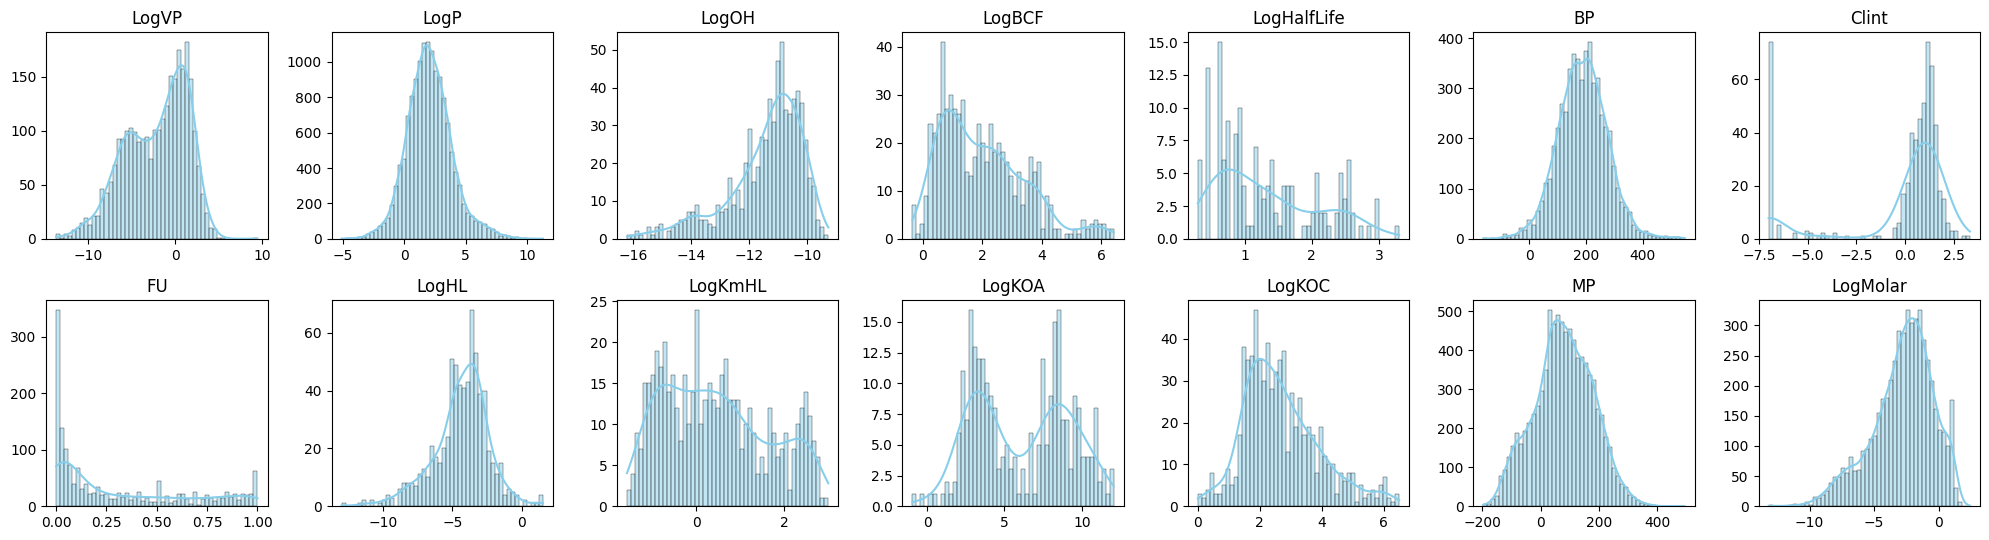

In [2]:
# Load the data
df_combined = load_data()
df_combined

# Plot the histograms of the properties
plot_property_histograms(df_combined)

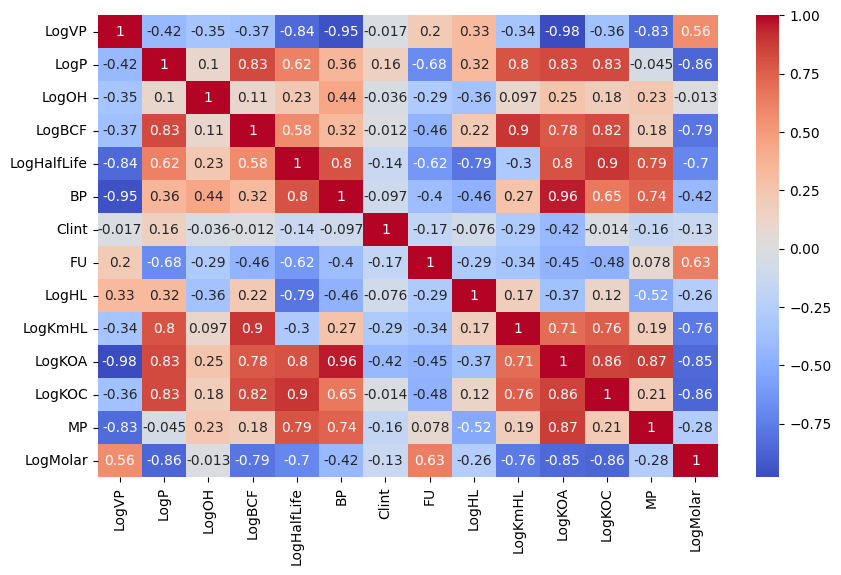

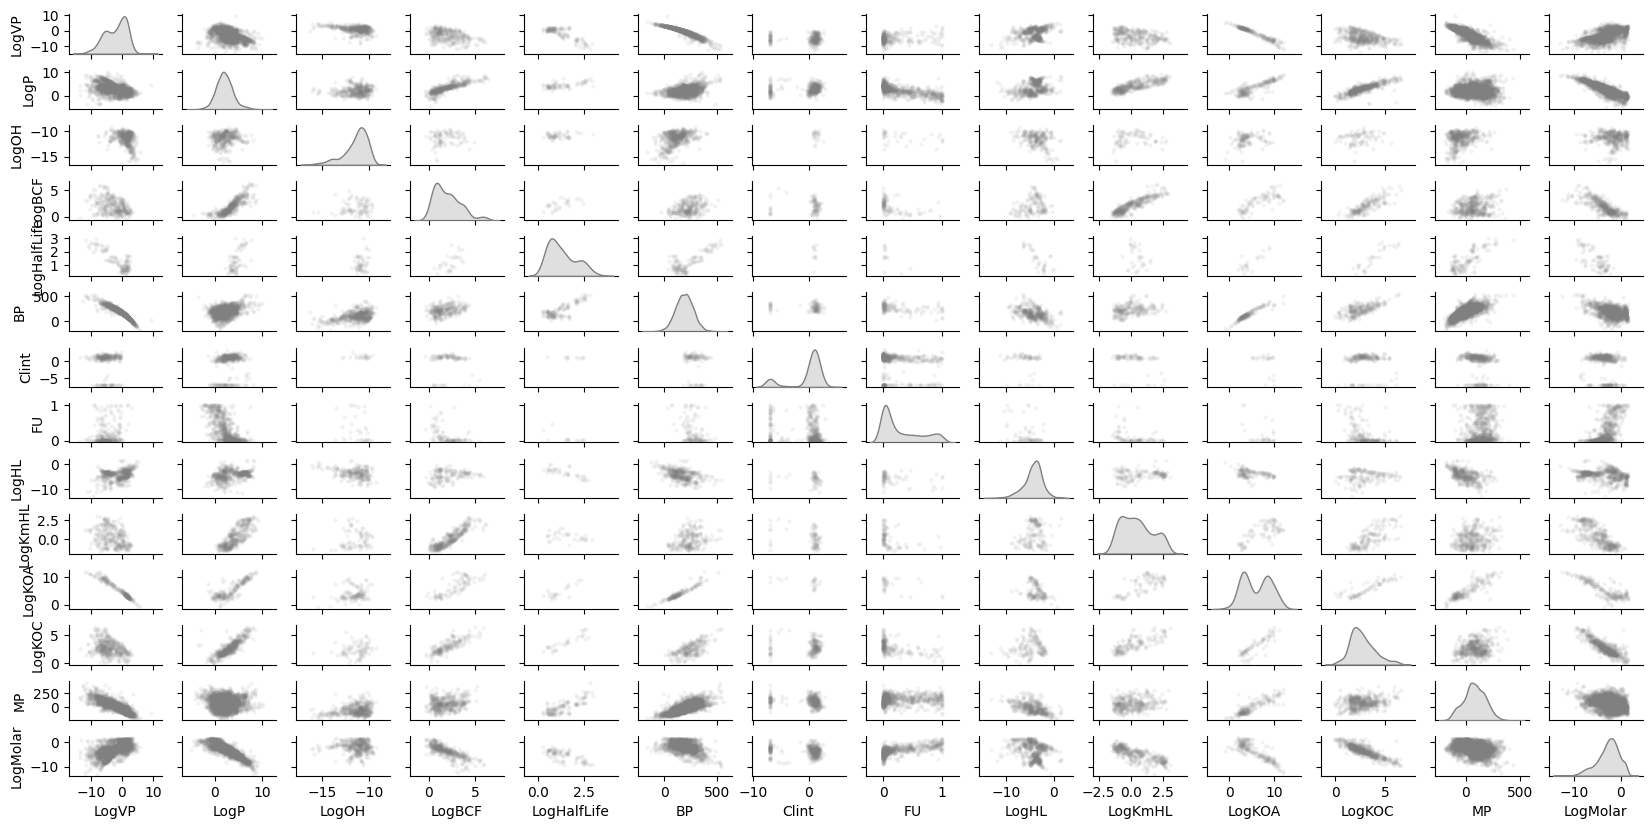

In [4]:
plt.figure(figsize=(10, 6))
# Correlation matrix
sns.heatmap(df_combined.drop(columns="SMILES").corr(), annot=True, cmap="coolwarm")
# All pairwise relations (this takes ~20 seconds)
sns.pairplot(df_combined.drop(columns="SMILES"), height=0.6, aspect=2, diag_kind="kde", markers=".", plot_kws={"alpha": 0.1, "linewidth": 0, "color": "gray"}, diag_kws={"color": "gray"})

In [4]:
#split check: if we do a random split 80/20, do we also get a 80/20 split for each property?
train, test = train_test_split(df_combined, test_size=0.2, random_state=42)
for col in df_combined.columns[1:]:
    print(f'{col}: {test[col].count()/df_combined[col].count()}')

LogVP: 0.19005328596802842
LogP: 0.20147702014770202
LogOH: 0.17630057803468208
LogBCF: 0.1794871794871795
LogHalfLife: 0.19333333333333333
BP: 0.19860114117430516
Clint: 0.21245421245421245
FU: 0.18753894080996886
LogHL: 0.1750358680057389
LogKmHL: 0.17190388170055454
LogKOA: 0.18518518518518517
LogKOC: 0.19640387275242047
MP: 0.19798657718120805
LogMolar: 0.20590490797546013


In [5]:
print(train['LogVP'].min(), train['LogVP'].max())

-13.677799318285587 5.243025639740706


LogVP: MannwhitneyuResult(statistic=621562.0, pvalue=0.49065826932018)
LogP: MannwhitneyuResult(statistic=15488671.0, pvalue=0.40501712112954824)
LogOH: MannwhitneyuResult(statistic=34035.5, pvalue=0.7141621324366001)
LogBCF: MannwhitneyuResult(statistic=28190.0, pvalue=0.7805376931248362)
LogHalfLife: MannwhitneyuResult(statistic=1734.0, pvalue=0.9240833659084389)
BP: MannwhitneyuResult(statistic=2301402.0, pvalue=0.3022655363722151)
Clint: MannwhitneyuResult(statistic=25997.0, pvalue=0.48297318456882443)
FU: MannwhitneyuResult(statistic=195347.5, pvalue=0.9007237524438522)
LogHL: MannwhitneyuResult(statistic=34479.0, pvalue=0.7681442831570467)
LogKmHL: MannwhitneyuResult(statistic=21793.0, pvalue=0.48381247999507615)
LogKOA: MannwhitneyuResult(statistic=5109.0, pvalue=0.43333837685050247)
LogKOC: MannwhitneyuResult(statistic=39823.0, pvalue=0.5222747067334923)
MP: MannwhitneyuResult(statistic=5956132.5, pvalue=0.7729768655957563)
LogMolar: MannwhitneyuResult(statistic=2194501.0, pval

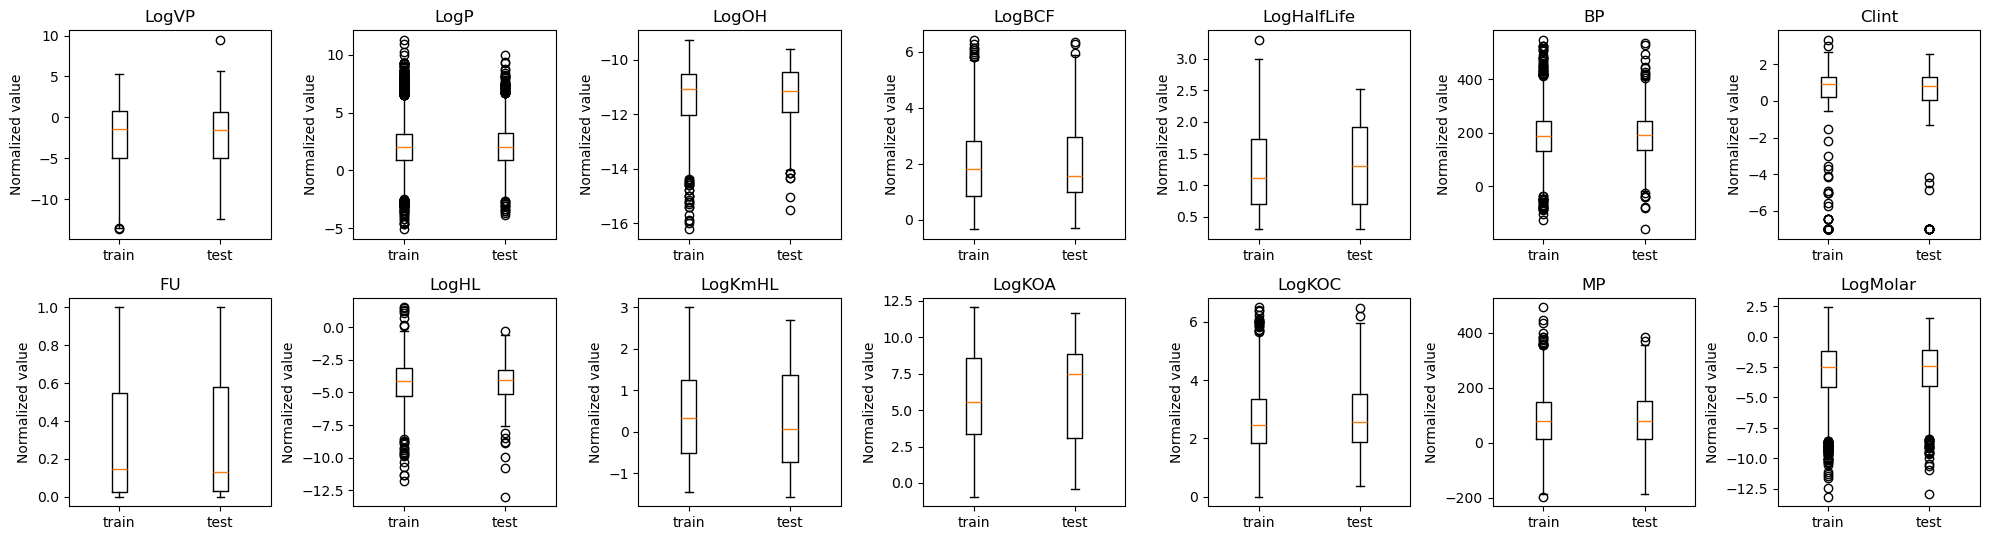

In [6]:
compare_distributions(df_combined, train, test)

In [7]:
print(f'duplicated smiles: {df_combined.SMILES.duplicated().sum()}')
if not os.path.exists('data'):
    os.makedirs('data')
train.to_csv('data/train.csv',index=False)
test.to_csv('data/test.csv',index=False)
print(f'Number of training datapoints: {len(train)}\nNumber of test datapoints: {len(test)}')

duplicated smiles: 0
Number of training datapoints: 18582
Number of test datapoints: 4646
